## Serena Wisnewski and Eric Cortez
CSC 405 <br>
COVID Team 3 <br>
Project Stage IV <br>
Team Notebook <br>

**Import Libraries**

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

**Import Data**

In [2]:
#import datasets
main_data = pd.read_csv("../data/owid-covid-data.csv")
large_data = pd.read_csv("../data/covid_large.csv")

#obtain only the information for the USA
USA_main_data = main_data.loc[main_data['iso_code'] == 'USA']

#reset index of the dataset
USA_main_data = USA_main_data.reset_index(drop=True)

## Task 1 <br>
**Main Graph of USA Covid-19 Data**

Data Manipulation

In [3]:
#obtain only the needed columns
main_graph = USA_main_data[['date', 'new_cases', 'new_cases_per_million', 'new_deaths', 'new_deaths_per_million']]

#rename columns
main_graph.columns = ['Date', 'New Cases', 'New Cases (log)', 'New Deaths', 'New Deaths (log)']

#display dataset for task 1
main_graph

,Date,New Cases,New Cases (log),New Deaths,New Deaths (log)
0,2019-12-31,0.0,0.000,0.0,0.000
1,2020-01-01,0.0,0.000,0.0,0.000
2,2020-01-02,0.0,0.000,0.0,0.000
3,2020-01-03,0.0,0.000,0.0,0.000
4,2020-01-04,0.0,0.000,0.0,0.000
...,...,...,...,...,...
329,2020-11-24,173963.0,525.564,919.0,2.776
330,2020-11-25,170293.0,514.476,2224.0,6.719
331,2020-11-26,186589.0,563.708,2341.0,7.072
332,2020-11-27,106091.0,320.514,1189.0,3.592


In [4]:
#obtain the date of the first case
first_case_index = main_graph['New Cases'].ne(0).idxmax() 

#obtain the date of the first death
first_death_index= main_graph['New Deaths'].ne(0).idxmax() 

#list to hold the cases since day 1
numOfCasesSinceDay1=[]

#list to hold the deaths since day 1
numOfDeathsSinceDay1=[]

#loop to compute the number of cases since day 1
counter=1
for i,index in enumerate(range(len(main_graph))):
    if i<=first_case_index:
        numOfCasesSinceDay1.insert(index, 0) 
    else:
        numOfCasesSinceDay1.insert(index, counter) 
        counter = counter+1

#loop to compute the number of deaths since day 1
counter=1
for i,index in enumerate(range(len(main_graph))):
    if i<=first_death_index:
        numOfDeathsSinceDay1.insert(index, 0) 
    else:
        numOfDeathsSinceDay1.insert(index, counter) 
        counter = counter+1

#insert list into dataset as a column
main_graph.insert(2, "numOfCasesSinceDay1", numOfCasesSinceDay1)

#insert list into dataset as a column   
main_graph.insert(2, "numOfDeathsSinceDay1", numOfDeathsSinceDay1)

#print dataset
main_graph

,Date,New Cases,numOfDeathsSinceDay1,numOfCasesSinceDay1,New Cases (log),New Deaths,New Deaths (log)
0,2019-12-31,0.0,0,0,0.000,0.0,0.000
1,2020-01-01,0.0,0,0,0.000,0.0,0.000
2,2020-01-02,0.0,0,0,0.000,0.0,0.000
3,2020-01-03,0.0,0,0,0.000,0.0,0.000
4,2020-01-04,0.0,0,0,0.000,0.0,0.000
...,...,...,...,...,...,...,...
329,2020-11-24,173963.0,268,308,525.564,919.0,2.776
330,2020-11-25,170293.0,269,309,514.476,2224.0,6.719
331,2020-11-26,186589.0,270,310,563.708,2341.0,7.072
332,2020-11-27,106091.0,271,311,320.514,1189.0,3.592


**Obtain the Regression Models**

In [5]:
#obtain x from the dataset as the number of cases since day 1
X = main_graph.iloc[:,3].values.reshape(-1, 1) 

#obtain y from the dataset as the number of cases per day
y = main_graph.iloc[:,1].values.reshape(-1, 1)

#create regression for a polynomial of degree 3
poly3 = PolynomialFeatures(degree = 3)
poly_features3 = poly3.fit_transform(X)
poly3.fit(X,y)
poly_regression3 = LinearRegression()
poly_regression3.fit(poly_features3,y)

#insert list into dataset as a column
regression = poly_regression3.predict(poly_features3)
main_graph.insert(2, "Polynomial Case Model Prediction", regression)

In [6]:
#obtain x from the dataset as the number of cases since day 1
X = main_graph.iloc[:,3].values.reshape(-1, 1) 

#obtain y from the dataset as the number of cases per day
y = main_graph.iloc[:,4].values.reshape(-1, 1)

#create regression for a polynomial of degree 3
poly3 = PolynomialFeatures(degree = 3)
poly_features3 = poly3.fit_transform(X)
poly3.fit(X,y)
poly_regression3 = LinearRegression()
poly_regression3.fit(poly_features3,y)

#insert list into dataset as a column
regression = poly_regression3.predict(poly_features3)
main_graph.insert(2, "Polynomial Case Model Prediction (log)", regression)

In [7]:
#obtain x from the dataset as the number of deaths since day 1
X = main_graph.iloc[:,2].values.reshape(-1, 1) 

#obtain y from the dataset as the number of deaths per day
y = main_graph.iloc[:,5].values.reshape(-1, 1)

#create regression for a polynomial of degree 3
poly3 = PolynomialFeatures(degree = 3)
poly_features3 = poly3.fit_transform(X)
poly3.fit(X,y)
poly_regression3 = LinearRegression()
poly_regression3.fit(poly_features3,y)

#insert list into dataset as a column
regression = poly_regression3.predict(poly_features3)
main_graph.insert(2, "Polynomial Death Model Prediction", regression)

In [8]:
#obtain x from the dataset as the number of deaths since day 1
X = main_graph.iloc[:,2].values.reshape(-1, 1) 

#obtain y from the dataset as the number of deaths per day
y = main_graph.iloc[:,6].values.reshape(-1, 1)

#create regression for a polynomial of degree 3
poly3 = PolynomialFeatures(degree = 3)
poly_features3 = poly3.fit_transform(X)
poly3.fit(X,y)
poly_regression3 = LinearRegression()
poly_regression3.fit(poly_features3,y)

#insert list into dataset as a column
regression = poly_regression3.predict(poly_features3)
main_graph.insert(2, "Polynomial Death Model Prediction (log)", regression)

In [9]:
#drop unneeded columns
main_graph = main_graph.drop(['numOfDeathsSinceDay1', 'numOfCasesSinceDay1'],axis=1)

#display final dataset
main_graph

,Date,New Cases,Polynomial Death Model Prediction (log),Polynomial Death Model Prediction,Polynomial Case Model Prediction (log),Polynomial Case Model Prediction,New Cases (log),New Deaths,New Deaths (log)
0,2019-12-31,0.0,18.141608,18.206868,18.863075,-11686.990988,0.000,0.0,0.000
1,2020-01-01,0.0,18.141608,18.206868,18.863075,-11686.990988,0.000,0.0,0.000
2,2020-01-02,0.0,18.141608,18.206868,18.863075,-11686.990988,0.000,0.0,0.000
3,2020-01-03,0.0,18.141608,18.206868,18.863075,-11686.990988,0.000,0.0,0.000
4,2020-01-04,0.0,18.141608,18.206868,18.863075,-11686.990988,0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...
329,2020-11-24,173963.0,312.866316,312.860905,312.039599,140887.968034,525.564,919.0,2.776
330,2020-11-25,170293.0,314.193280,314.185055,313.305292,142711.614705,514.476,2224.0,6.719
331,2020-11-26,186589.0,315.528241,315.517096,314.577197,144555.133672,563.708,2341.0,7.072
332,2020-11-27,106091.0,316.871293,316.857118,315.855369,146418.634048,320.514,1189.0,3.592


### Dash Graph

In [10]:

#make a dash app
app = JupyterDash(__name__)

#set the layout for the dash app
app.layout = html.Div([
    
     #name for the dash app
     html.H1("USA Covid Data", style = {'text_align' : 'center'}),
    
    #make a dropdown object to hold the differnt graph options
    dcc.Dropdown(
        
        #name of the object
        id = 'dropdown', 
        
        #the options for the dropdown menu
        options = [
            {'label': 'New Cases (linear)', 'value': 'New Cases (linear)'},
            {'label': 'New Deaths (linear)', 'value': 'New Deaths (linear)'},
            {'label': 'New Cases (log)', 'value': 'New Cases (log)'},
            {'label': 'New Deaths (log)', 'value':'New Deaths (log)'}],
        
        #initial value of the dropdown menu
        value = 'New Cases (linear)',
        
        #disable mutiple choices
        multi = False,
        
        #disable empty choices
        clearable = False,
        
        #design the style of the dropdown menu
        style = {'width': "100%", 'text-align': 'center'}),
    
    #graph object
    dcc.Graph(id = 'graph'),
    
    #object for the range slider
    dcc.RangeSlider(
        
        #name of the range slider
        id='range-slider',
        
        #min value of the range slider
        min = '2019-12-31',
        
        #max value of the range slider
        max = '2020-10-12',
        
        #initial value of teh range slider
        value = ['2019-12-31', '2020-10-12'],
        
        #marks on the range slider that correspond to the dates
        marks = {x: x for x in main_graph['Date']}
    )
])


#callback to connect dash with plotyly
@app.callback(
    Output('graph', 'figure'),
    [Input('dropdown', 'value'),
    Input('range-slider', 'value')]
)

#function to update the graph
def update_figure(column, dates):
    
    #obtain the range of dates specified by the range slider
    df = main_graph[(main_graph['Date'] >= dates[0]) & (main_graph['Date'] <= dates[1])]
    
    #conditional statements to display appropriate graphs depending on the dropdown menu selection
    if column == 'New Cases (linear)':
        return px.line(df, x = 'Date', y = [df.columns[1], df.columns[5]], labels = {'value' : ' New Cases'})
    elif column == 'New Deaths (linear)':
        return px.line(df, x = 'Date', y = [df.columns[7], df.columns[3]], labels = {'value' : ' New Deaths'})
    elif column == 'New Cases (log)':
        return px.line(df, x = 'Date', y = [df.columns[6], df.columns[4]], labels = {'value' : ' New Cases (log)'})
    else:
        return px.line(df, x = 'Date', y = [df.columns[8], df.columns[2]], labels = {'value' : ' New Deaths (log)'})
    
#run dash app
app.run_server(mode = 'inline')

## Task 2

**Plot Trends with Seven Day Average**

In [11]:
df_cases_7da = USA_main_data[['date','new_cases']]

df_cases_7da = df_cases_7da.set_index('date')
df_cases_7da['MA'] = df_cases_7da.rolling(window=7).mean()
df_cases_7da

,new_cases,MA
date,,
2019-12-31,0.0,NaN
2020-01-01,0.0,NaN
2020-01-02,0.0,NaN
2020-01-03,0.0,NaN
2020-01-04,0.0,NaN
...,...,...
2020-11-24,173963.0,173626.571429
2020-11-25,170293.0,175909.000000
2020-11-26,186589.0,178278.142857


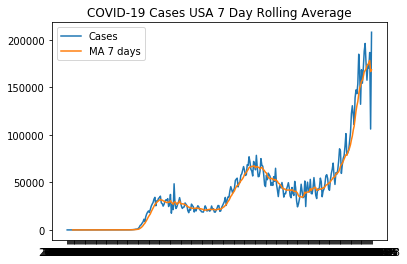

In [12]:
plt.plot(df_cases_7da['new_cases'],label= 'Cases')
plt.plot(df_cases_7da['new_cases'].rolling(7).mean(),label= 'MA 7 days')
plt.legend(loc='best')
plt.title('COVID-19 Cases USA 7 Day Rolling Average')
plt.show()

In [13]:
df_deaths_7da = USA_main_data[['date','new_deaths']]

df_deaths_7da = df_deaths_7da.set_index('date')
df_deaths_7da['MA'] = df_deaths_7da.rolling(window=7).mean()
df_deaths_7da

,new_deaths,MA
date,,
2019-12-31,0.0,NaN
2020-01-01,0.0,NaN
2020-01-02,0.0,NaN
2020-01-03,0.0,NaN
2020-01-04,0.0,NaN
...,...,...
2020-11-24,919.0,1497.285714
2020-11-25,2224.0,1605.428571
2020-11-26,2341.0,1675.571429


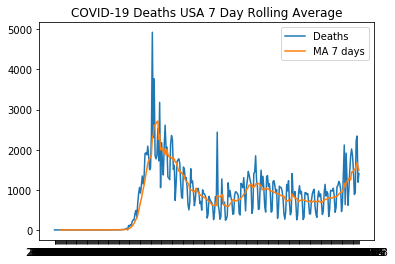

In [14]:
plt.plot(df_deaths_7da['new_deaths'],label= 'Deaths')
plt.plot(df_deaths_7da['new_deaths'].rolling(7).mean(),label= 'MA 7 days')
plt.legend(loc='best')
plt.title('COVID-19 Deaths USA 7 Day Rolling Average')
plt.show()

**Map**

In [15]:
#obtain recent data
recent_data = large_data.loc[large_data['Date'] == '2020-11-27']

In [16]:
#make and display test plot
fig = ff.create_choropleth(fips=recent_data['countyFIPS'], values=recent_data['Num of Cases'])
fig.layout.template = None
fig.show()

ValueError: 
The create_choropleth figure factory requires the plotly-geo package.
Install using pip with:

$ pip install plotly-geo

Or, install using conda with

$ conda install -c plotly plotly-geo
